In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

In [2]:
import imblearn

## Q1

### The gamma ranges from 0.3 to 0.5.

 If there are 100 variables, 50 positive and 50 negative, then the gamma is taken as the minimum when 30 positive and 50 negative predictions are correct, and the gamma is the maximum when 50 positive and 30 negative predictions are correct.

### Recall: Maxium is 1, Minium equals to 30/(30+20) equals to 0.6.

### Precision: Maxium is 1, Minium equals to 50/(50+20) approximately equals to 0.71.

In [3]:
## Let draw a plot to elaborate this

The title is underqualified, so we assume a lot of conditions (as we mentioned before) and then fit the model which qualifies the accruracy equals to 80%.

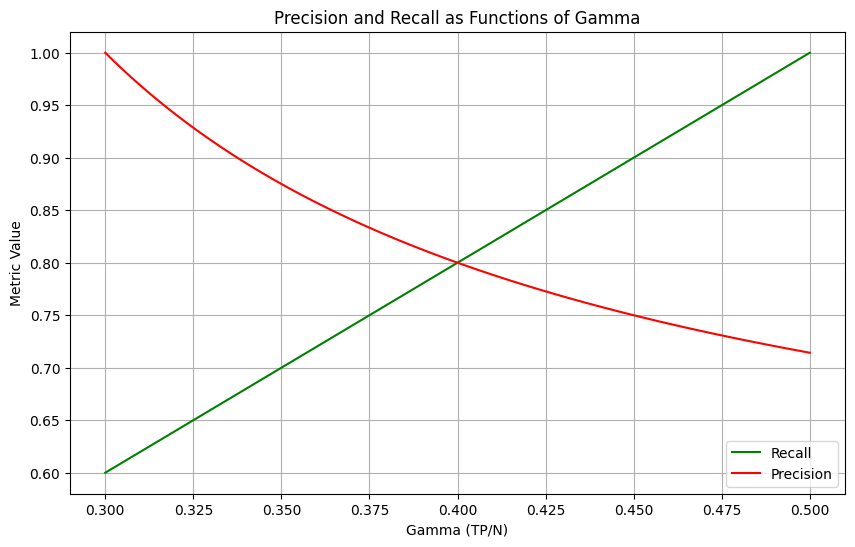

In [34]:
# Assuming the gamma
gamma_values = np.linspace(0.30, 0.50, 100)

recall_values = []
precision_values = []

for gamma in gamma_values:
    TP = gamma * 100
    FN = 50 - TP  # Positive euqals to nagative euqals to 50
    FP = 20 - FN  # Since FP + FN = 20
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    recall_values.append(recall)
    precision_values.append(precision)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, recall_values, label='Recall', color='green')
plt.plot(gamma_values, precision_values, label='Precision', color='red')
plt.title('Precision and Recall as Functions of Gamma')
plt.xlabel('Gamma (TP/N)')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()

We can clearly see there's a trade-off between recall and precision, with the values of gamma goes up, so as the recall and the precision goes down.

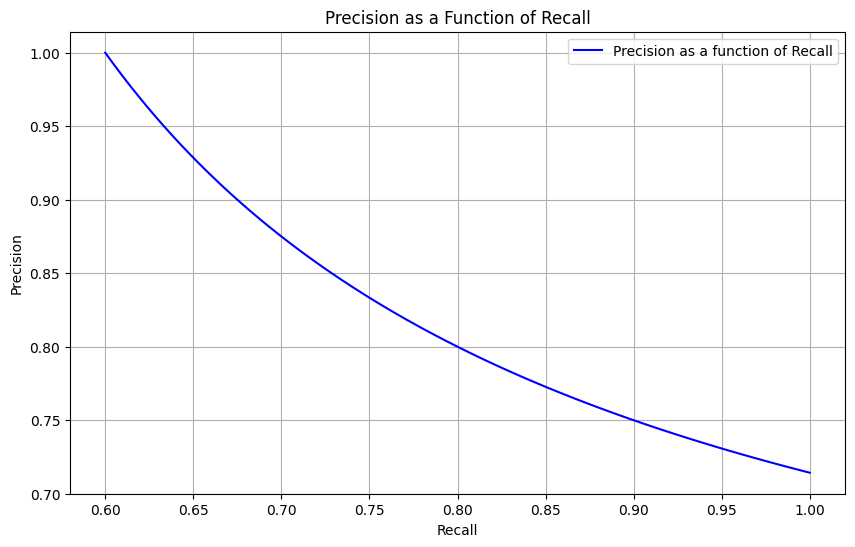

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(recall_values, precision_values, label='Precision as a function of Recall', color='blue')
plt.title('Precision as a Function of Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

As recall increases, precision varies in a complex way with an overall negative correlation.

## Q2

In [9]:
# Load dataset
df = pd.read_csv('card_transdata-1.csv')
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1,1,0,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1,0
999998,4.258729,0.242023,0.475822,1,0,0,1,0


In [11]:
from imblearn.over_sampling import SMOTENC

In [24]:
## Spilt the train data and test data
train_df = df.iloc[:500000, :]
test_df = df.iloc[500000:, :]

# Set indeces
categorical_features = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
categorical_indices = [train_df.columns.get_loc(c) for c in categorical_features]

In [25]:
X_train = train_df.drop('fraud', axis=1)
y_train = train_df['fraud']
X_test = test_df.drop('fraud', axis=1)
y_test = test_df['fraud']

In [14]:
## Spilt the train data and test data
train_df = df.iloc[:500000, :]
test_df = df.iloc[500000:, :]

# Set indeces
categorical_features = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
categorical_indices = [train_df.columns.get_loc(c) for c in categorical_features]

# Run a loop
for gamma in [i/10 for i in range(1, 11)]:
    
    if gamma < 1:
        n_minority = train_df[train_df['fraud'] == 1].shape[0]
        n_majority = train_df[train_df['fraud'] == 0].shape[0]
        ratio = gamma / (1 - gamma)
        n_minority_oversampled = int(n_majority * ratio)
        sampling_strategy = {1: n_minority_oversampled}
    else:
        # gamma = 1
        sampling_strategy = 'auto'
    
    # Initialize SMOTENC
    smotenc = SMOTENC(categorical_features=categorical_indices, sampling_strategy={1: n_minority_oversampled}, random_state=42)
    
    
    X_train = train_df.drop('fraud', axis=1)
    y_train = train_df['fraud']
    
    # Apply Smotenc
    X_resampled, y_resampled = smotenc.fit_resample(X_train, y_train)
    
    # Print the results
    print(f'For gamma = {gamma}, the class distribution is: {Counter(y_resampled)}')

For gamma = 0.1, the class distribution is: Counter({0: 456333, 1: 50703})
For gamma = 0.2, the class distribution is: Counter({0: 456333, 1: 114083})
For gamma = 0.3, the class distribution is: Counter({0: 456333, 1: 195571})
For gamma = 0.4, the class distribution is: Counter({0: 456333, 1: 304222})
For gamma = 0.5, the class distribution is: Counter({0: 456333, 1: 456333})


D:\Anaconda3\Lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (684499) in class 1 will be larger than the number of samples in the majority class (class #0 -> 456333)
  warnings.warn(


For gamma = 0.6, the class distribution is: Counter({1: 684499, 0: 456333})


D:\Anaconda3\Lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (1064776) in class 1 will be larger than the number of samples in the majority class (class #0 -> 456333)
  warnings.warn(


For gamma = 0.7, the class distribution is: Counter({1: 1064776, 0: 456333})


D:\Anaconda3\Lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (1825332) in class 1 will be larger than the number of samples in the majority class (class #0 -> 456333)
  warnings.warn(


For gamma = 0.8, the class distribution is: Counter({1: 1825332, 0: 456333})


D:\Anaconda3\Lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (4106997) in class 1 will be larger than the number of samples in the majority class (class #0 -> 456333)
  warnings.warn(


For gamma = 0.9, the class distribution is: Counter({1: 4106997, 0: 456333})


D:\Anaconda3\Lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (4106997) in class 1 will be larger than the number of samples in the majority class (class #0 -> 456333)
  warnings.warn(


For gamma = 1.0, the class distribution is: Counter({1: 4106997, 0: 456333})


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support

In [18]:
## Split the variables
X_test = test_df.drop('fraud', axis=1)
y_test = test_df['fraud']

performance_metrics = {}
oversampled_datasets = {}

In [21]:
# Reset index
categorical_features = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
categorical_indices = [train_df.columns.get_loc(c) for c in categorical_features]

In [26]:
for gamma in [i/10 for i in range(1, 11)]:
    # Dynamic
    n_minority = y_train[y_train == 1].shape[0]
    n_majority = y_train[y_train == 0].shape[0]
    if gamma < 1:
        n_minority_oversampled = int(n_majority * gamma / (1 - gamma))
        sampling_strategy = {1: n_minority_oversampled}
    else:
        sampling_strategy = 'auto'
    
    # resample
    smotenc = SMOTENC(categorical_features=categorical_indices, sampling_strategy=sampling_strategy, random_state=42)
    X_resampled, y_resampled = smotenc.fit_resample(X_train, y_train)
    
    # fit the DT
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(X_resampled, y_resampled)
    
    # test model
    y_train_pred = clf.predict(X_resampled)
    y_test_pred = clf.predict(X_test)
    train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(y_resampled, y_train_pred, average='binary')
    test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='binary')
    
    # Print the results
    print(f"For gamma = {gamma}:")
    print(f"Training Precision: {train_precision}, Recall: {train_recall}, F1: {train_f1}")
    print(f"Testing Precision: {test_precision}, Recall: {test_recall}, F1: {test_f1}\n")

For gamma = 0.1:
Training Precision: 1.0, Recall: 1.0, F1: 1.0
Testing Precision: 0.9999085233379834, Recall: 0.9997027620267057, F1: 0.9998056320958578

For gamma = 0.2:
Training Precision: 1.0, Recall: 1.0, F1: 1.0
Testing Precision: 0.9997027688227359, Recall: 0.9997256264861899, F1: 0.9997141975238074

For gamma = 0.3:
Training Precision: 1.0, Recall: 1.0, F1: 1.0
Testing Precision: 0.9991773684932133, Recall: 0.9997713554051583, F1: 0.9994742736976846

For gamma = 0.4:
Training Precision: 1.0, Recall: 1.0, F1: 1.0
Testing Precision: 0.9992686550108559, Recall: 0.9997027620267057, F1: 0.9994856613823137

For gamma = 0.5:
Training Precision: 1.0, Recall: 1.0, F1: 1.0
Testing Precision: 0.9986068924566652, Recall: 0.9997713554051583, F1: 0.9991887846623174



D:\Anaconda3\Lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (684499) in class 1 will be larger than the number of samples in the majority class (class #0 -> 456333)
  warnings.warn(


For gamma = 0.6:
Training Precision: 1.0, Recall: 1.0, F1: 1.0
Testing Precision: 0.9986752244124163, Recall: 0.9997027620267057, F1: 0.999188729046928



D:\Anaconda3\Lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (1064776) in class 1 will be larger than the number of samples in the majority class (class #0 -> 456333)
  warnings.warn(


For gamma = 0.7:
Training Precision: 1.0, Recall: 1.0, F1: 1.0
Testing Precision: 0.9983787733479472, Recall: 0.9997027620267057, F1: 0.9990403290300469



D:\Anaconda3\Lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (1825332) in class 1 will be larger than the number of samples in the majority class (class #0 -> 456333)
  warnings.warn(


For gamma = 0.8:
Training Precision: 1.0, Recall: 1.0, F1: 1.0
Testing Precision: 0.9980369778589363, Recall: 0.9997256264861899, F1: 0.9988805884906221



D:\Anaconda3\Lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (4106997) in class 1 will be larger than the number of samples in the majority class (class #0 -> 456333)
  warnings.warn(


For gamma = 0.9:
Training Precision: 1.0, Recall: 1.0, F1: 1.0
Testing Precision: 0.9978776329902553, Recall: 0.9997713554051583, F1: 0.9988235965964252

For gamma = 1.0:
Training Precision: 1.0, Recall: 1.0, F1: 1.0
Testing Precision: 0.9986068924566652, Recall: 0.9997713554051583, F1: 0.9991887846623174



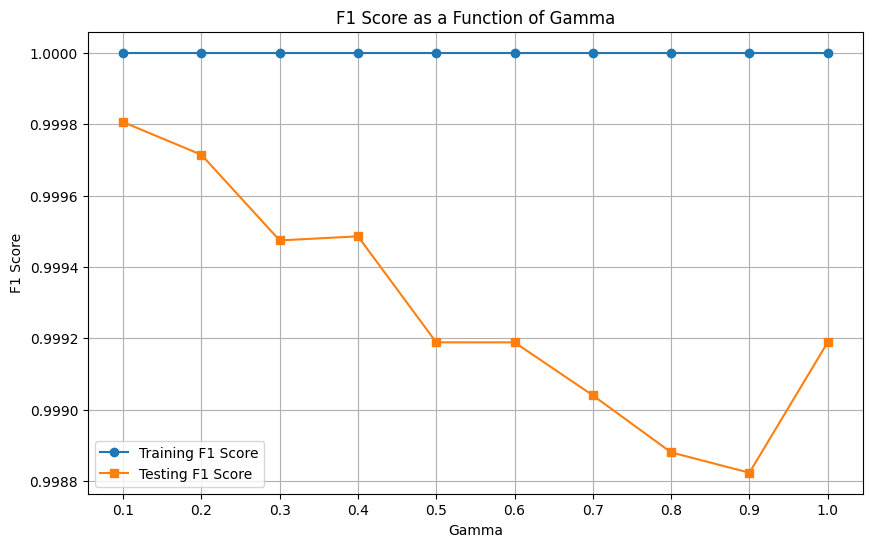

In [27]:
testing_f1_scores = [
    0.9998056320958578,  # gamma = 0.1
    0.9997141975238074,  # gamma = 0.2
    0.9994742736976846,  # gamma = 0.3
    0.9994856613823137,  # gamma = 0.4
    0.9991887846623174,  # gamma = 0.5
    0.999188729046928,   # gamma = 0.6
    0.9990403290300469,  # gamma = 0.7
    0.9988805884906221,  # gamma = 0.8
    0.9988235965964252,  # gamma = 0.9
    0.9991887846623174   # gamma = 1.0
]

plt.figure(figsize=(10, 6))
plt.plot(gamma_values, training_f1_scores, label='Training F1 Score', marker='o')
plt.plot(gamma_values, testing_f1_scores, label='Testing F1 Score', marker='s')
plt.title('F1 Score as a Function of Gamma')
plt.xlabel('Gamma')
plt.ylabel('F1 Score')
plt.xticks(gamma_values)
plt.legend()
plt.grid(True)
plt.show()

Test F1 scores with A slight decrease with increasing values of γ may indicate that while SMOTE-NC improves the model's ability to recognise a small number of classes, it may also introduce a degree of overfitting or reduce the model's ability to generalise to unseen data

### In general, I think SMOTE-NC is somewhat effctive but the gamma should be limited to a low level.